In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [3]:
def get_vary(vary, h1, l_f, delta, i):
    return cPickle.load(open('bi_poo_vary_vary_{0}_h1_{1}_l_f_{2}_delta_{3}_i_{4}.p'.format(vary, h1, l_f, delta, i),'rb'))


vary_s = [str(a) for a in ['alpha', 'beta', 'r_max']]
h1_s = [str(a) for a in [False, True]]
l_f_s = [str(a) for a in [1.0, 10.0]]
delta_s_vary = [str(a) for a in np.linspace(-60.0, 60.0, 31)]
i_s = [str(a) for a in [0, 1, 2, 3, 4]]


params_vary = list(product(vary_s, h1_s, l_f_s, delta_s_vary, i_s))

data_vary = {tup:get_vary(*tup) for tup in params_vary}

In [4]:
def get_fit( h1, delta):
    return cPickle.load(open('bi_poo_fit_h1_{0}_delta_{1}.p'.format(h1, delta),'rb'))


delta_s_fit = [str(a) for a in np.linspace(-100.0, 100.0, 101)]


params_fit = list(product(h1_s, delta_s_fit))

data_fit = {tup:get_fit(*tup) for tup in params_fit}

In [5]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


##Fit experiments

In [6]:
bi_poo = loadtxt('.././experimental_data/bi_poo_stdp_points.csv',delimiter=',')
print len(bi_poo)

45


In [7]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

def plot_bi_poo():
    scatter(-bi_poo[:,0],bi_poo[:,1],lw=0,c='#984ea3',s=40,zorder=-100)
    plot([-100,100],[0,0],'k--')
    plot([0,0],[-60,120],'k--')
    xlim([-100,100])
    ylim([-60,120])

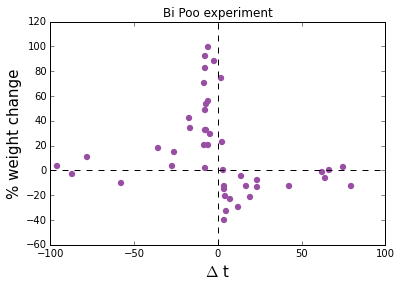

In [8]:
plot_bi_poo()
title('Bi Poo experiment')
xlabel('$\Delta$ t', fontsize=15)
ylabel('% weight change', fontsize=15)

In [9]:
def plot_fit(h1):
    dws = zeros(len(delta_s_fit))
    for idx, delta in enumerate(delta_s_fit):
        p = (str(h1), delta)
        dws[idx] = data_fit[p][0][0].res['weights'][-1]/data_fit[p][0][0].res['weights'][0]
    plot([float(a) for a in delta_s_fit], 100*dws-100)

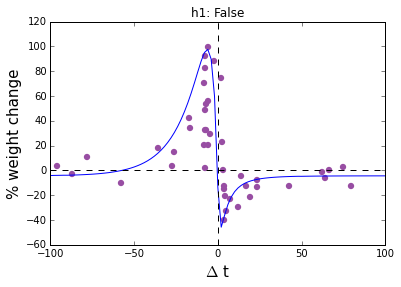

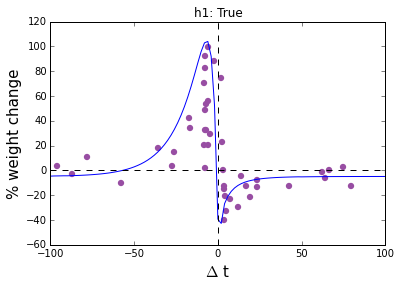

In [10]:
for h1 in h1_s:
    figure()
    plot_fit(h1)
    plot_bi_poo()
    xlabel('$\Delta$ t', fontsize=15)
    ylabel('% weight change', fontsize=15)
    title('h1: {0}'.format(h1))

## Sensitivity analysis

for the four combinations of $h\in \{1,\frac{\phi'}{\phi}\}$ and a small or big initial weight, we systematically $\alpha$, $\beta$ and r_max and plot the weight change curve.

we conclude that a basic STDP-like shape is not at all sensitive to the parameters

In [11]:
def show_plot(vary, h1, l_f):
    for i in [i_s[0], i_s[-1]] + i_s[1:-1]:
        dws = zeros(len(delta_s_vary))
        for idx, delta in enumerate(delta_s_vary):
            p = (vary, h1, l_f, delta, i)
            dws[idx] = data_vary[p][0][0].res['weights'][-1]/data_vary[p][0][0].res['weights'][0]
        plot(delta_s_vary, 100*dws-100)
    plot([-60,60],[1.0,1.0],'k--')


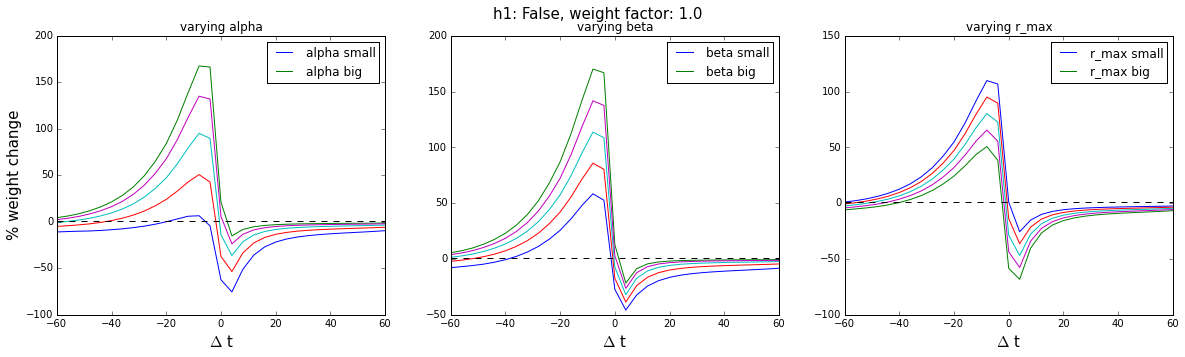

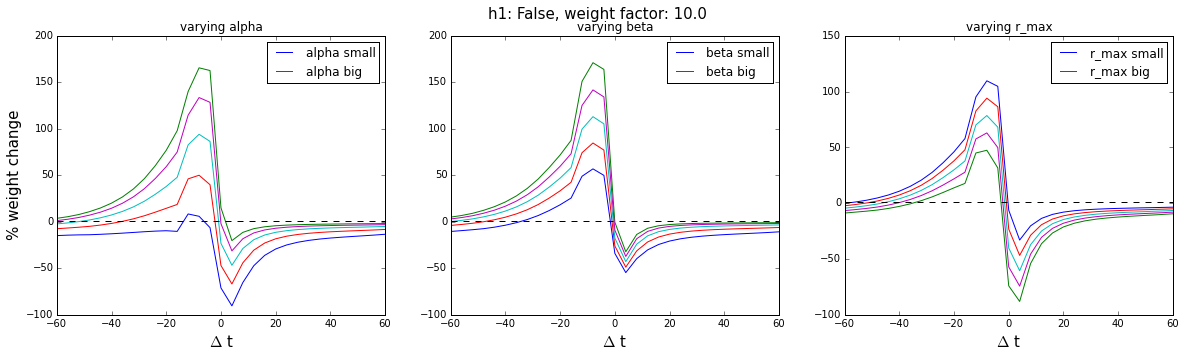

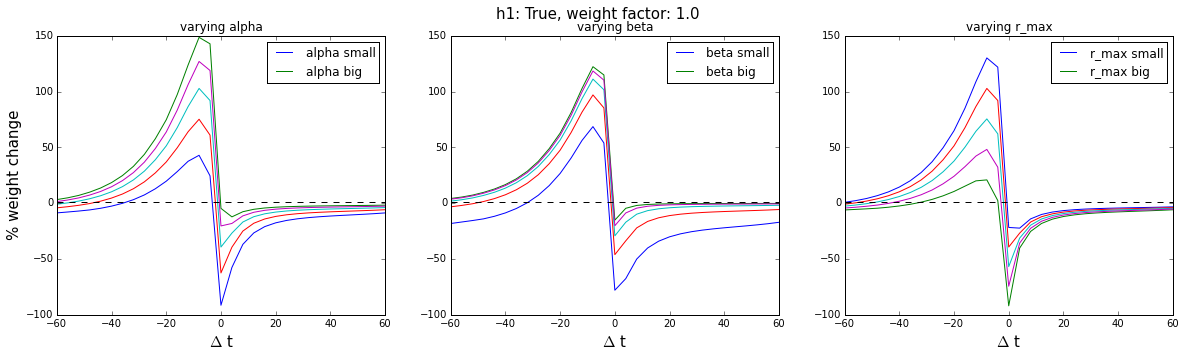

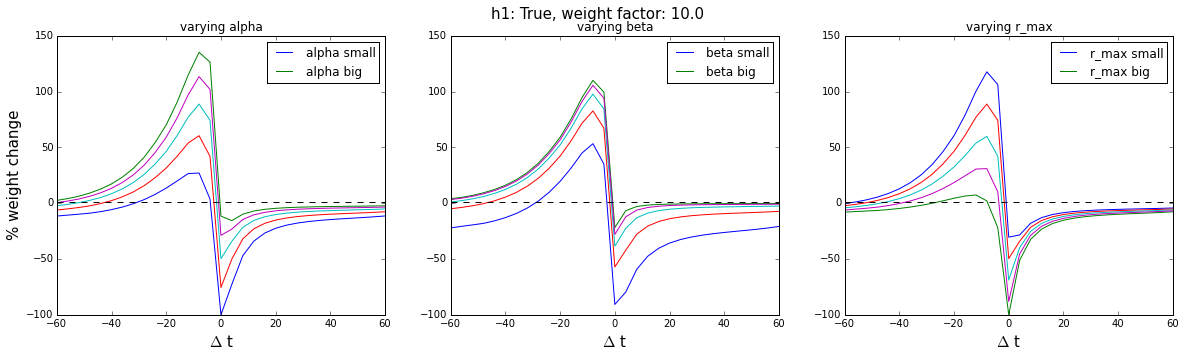

In [12]:
for h1 in h1_s:
    for l_f in l_f_s:
        figure(figsize=(20,5))
        for i, vary in enumerate(vary_s):
            subplot(1,3,i+1)
            show_plot(vary, h1, l_f)
            title('varying {0}'.format(vary))
            xlabel('$\Delta$ t', fontsize=15)
            if i==0:
                ylabel('% weight change', fontsize=15)
            legend(['{0} small'.format(vary), '{0} big'.format(vary)])
        suptitle('h1: {0}, weight factor: {1}'.format(h1, l_f), fontsize=15)

### interactive version

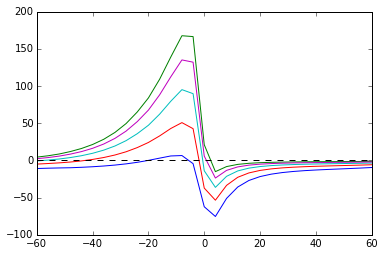

In [13]:
ts = data_vary[params_vary[0]][0][0].t
i = interact(show_plot,
key=widgets.ToggleButtons(description='key',options=['dendr_pred','weights','weight_updates', 'PIVs', 'y','h']),
t_min=(0,int(np.round(ts[-1]))),
t_max=(0,int(np.round(ts[-1]))),
vary=widgets.ToggleButtons(description='vary',options=vary_s),
h1=widgets.ToggleButtons(description='h1',options=h1_s),
l_f=widgets.ToggleButtons(description='l_f',options=l_f_s),
delta=widgets.ToggleButtons(description='delta',options=delta_s_vary),
i=widgets.ToggleButtons(description='i',options=i_s),
y_c=widgets.ToggleButtons(description='y_c',options=[str(a) for a in range(5)]))
